In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Load all Excel files
cc_avg_df = pd.read_excel("cc_avg_summary.xlsx")
cc_detailed_df = pd.read_excel("cc_detailed_summary.xlsx")
mi_grade_df = pd.read_excel("mi_grade_summary.xlsx", sheet_name=None)
raw_metrics_df = pd.read_excel("raw_metrics_summary.xlsx")

In [2]:
# Combine MI grade sheets
mi_combined = []
for sheet_name, df in mi_grade_df.items():
    df["Project"] = sheet_name
    mi_combined.append(df)
mi_combined_df = pd.concat(mi_combined, ignore_index=True)

In [3]:
# Table 1: Cyclomatic Complexity Summary
table1 = cc_detailed_df[[
    'Project', 'Functions_Analyzed', 'Average_Complexity',
    'Max_Complexity', 'Functions_>10_CC'
]]
print("\nTable 1: Cyclomatic Complexity Summary")
print(table1.to_string(index=False))


Table 1: Cyclomatic Complexity Summary
     Project  Functions_Analyzed  Average_Complexity  Max_Complexity  Functions_>10_CC
      django               37551                1.82              94               416
     fastapi                4270                2.01              44                31
       flask                1413                2.27              27                22
       sanic                3747                2.59              39                96
scikit-learn               11354                3.16              71               473
 statsmodels               14638                2.52              77               431
     tornado                3669                2.07              50                44


In [4]:
# Table 2: Code Size and Comments Summary
table2 = raw_metrics_df[[
    'Project', 'LOC', 'LLOC', 'SLOC', 'Comments', 'Blank'
]]
print("\nTable 2: Code Size and Comments Summary")
print(table2.to_string(index=False))


Table 2: Code Size and Comments Summary
     Project     LOC   LLOC   SLOC  Comments  Blank
      django 1109426 246974 372567     24724  65456
     fastapi  191378  29219  74163       966  12413
       flask   37088   9076  10193       952   4097
       sanic  128282  27529  43109      1973  10593
scikit-learn  794684 150940 227679     36132  69966
 statsmodels  851166 174197 247380     36393  67357
     tornado   97952  23167  28651      4513   7609


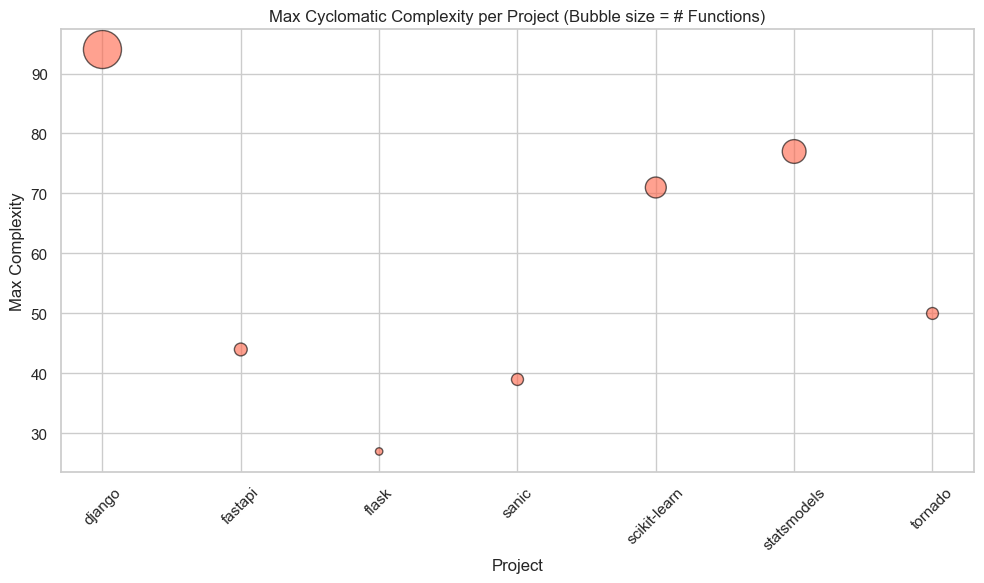

In [5]:
# Plot 2: Bubble Plot - Max Complexity vs Function Count
plt.figure(figsize=(10, 6))
sizes = cc_detailed_df['Functions_Analyzed'] / 50
plt.scatter(cc_detailed_df["Project"], cc_detailed_df["Max_Complexity"], s=sizes, alpha=0.6, c='tomato', edgecolors='black')
plt.title("Max Cyclomatic Complexity per Project (Bubble size = # Functions)")
plt.ylabel("Max Complexity")
plt.xlabel("Project")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

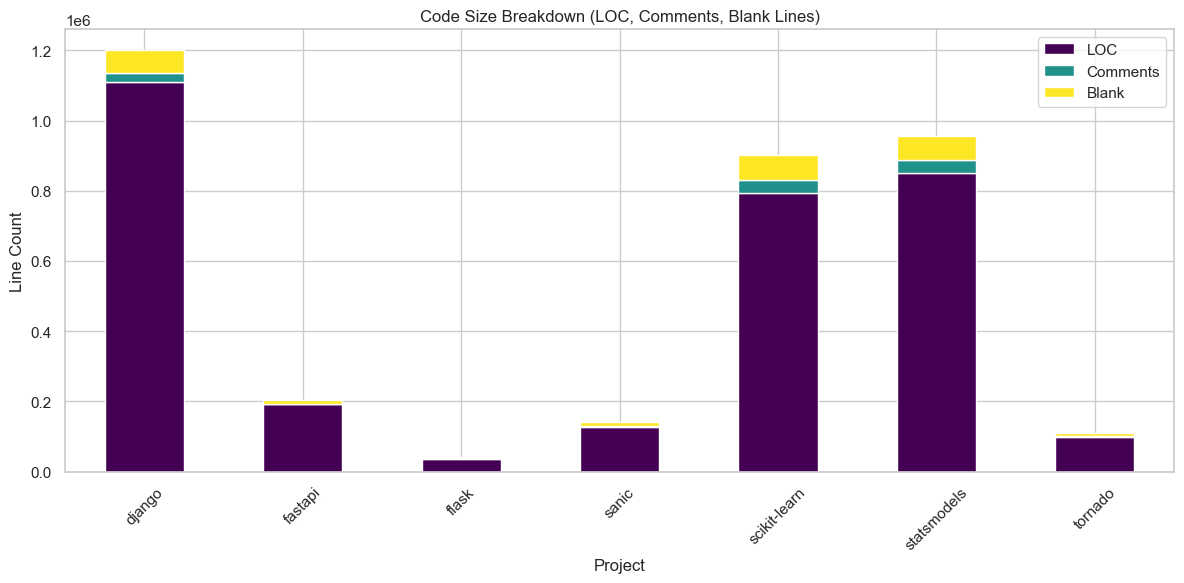

In [6]:
# Plot 3: Stacked Bar Chart - LOC, Comments, Blank
loc_data = raw_metrics_df[['Project', 'LOC', 'Comments', 'Blank']].set_index('Project')
loc_data[['Comments', 'Blank']] = loc_data[['Comments', 'Blank']].astype(float)
loc_data[['LOC', 'Comments', 'Blank']].plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Code Size Breakdown (LOC, Comments, Blank Lines)')
plt.ylabel('Line Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\manid\AppData\Local\Temp\ipykernel_34588\1358411891.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Project", y="Average_CC", data=cc_avg_df, palette="Blues_d")


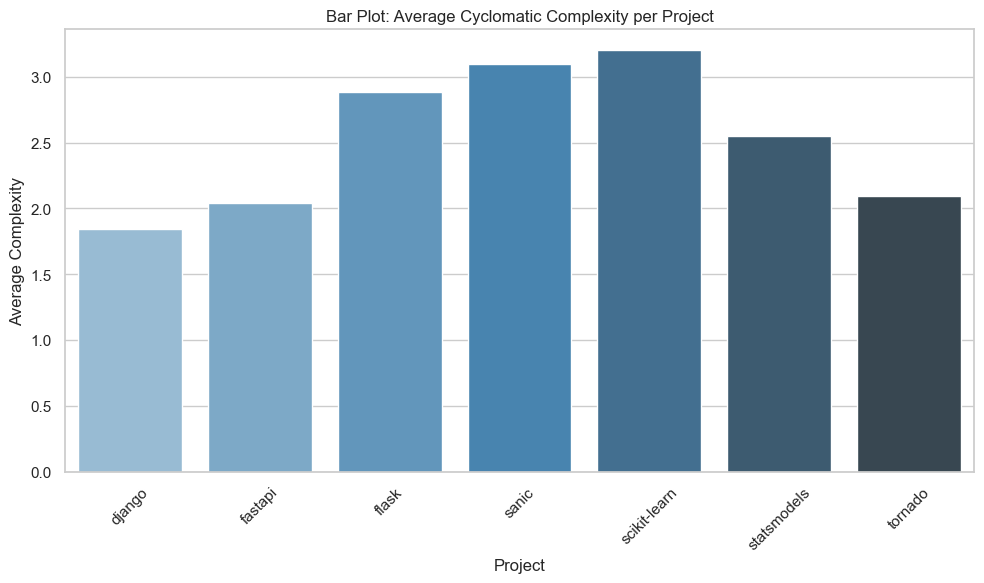

In [7]:

# Bar Plot: Average Complexity
plt.figure(figsize=(10, 6))
sns.barplot(x="Project", y="Average_CC", data=cc_avg_df, palette="Blues_d")
plt.title("Bar Plot: Average Cyclomatic Complexity per Project")
plt.ylabel("Average Complexity")
plt.xlabel("Project")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\manid\AppData\Local\Temp\ipykernel_34588\3710398868.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x="Project", y="Average_Complexity", data=cc_detailed_df, palette="Set3", linewidth=1)


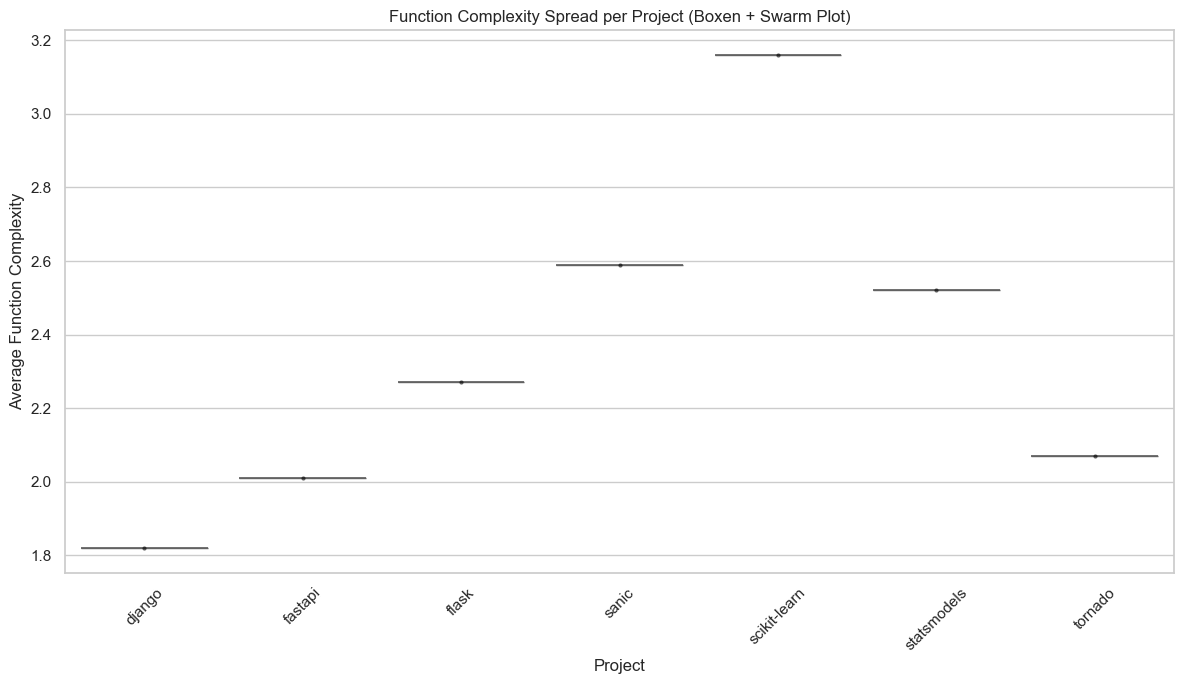

In [8]:
# Combine data for a composite visualization that replaces Plot 1, 4, and 7

# Plot A: Boxen plot + swarm of function complexity across projects
plt.figure(figsize=(12, 7))
sns.boxenplot(x="Project", y="Average_Complexity", data=cc_detailed_df, palette="Set3", linewidth=1)
sns.swarmplot(x="Project", y="Average_Complexity", data=cc_detailed_df, color='black', size=3, alpha=0.6)
plt.title("Function Complexity Spread per Project (Boxen + Swarm Plot)")
plt.ylabel("Average Function Complexity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

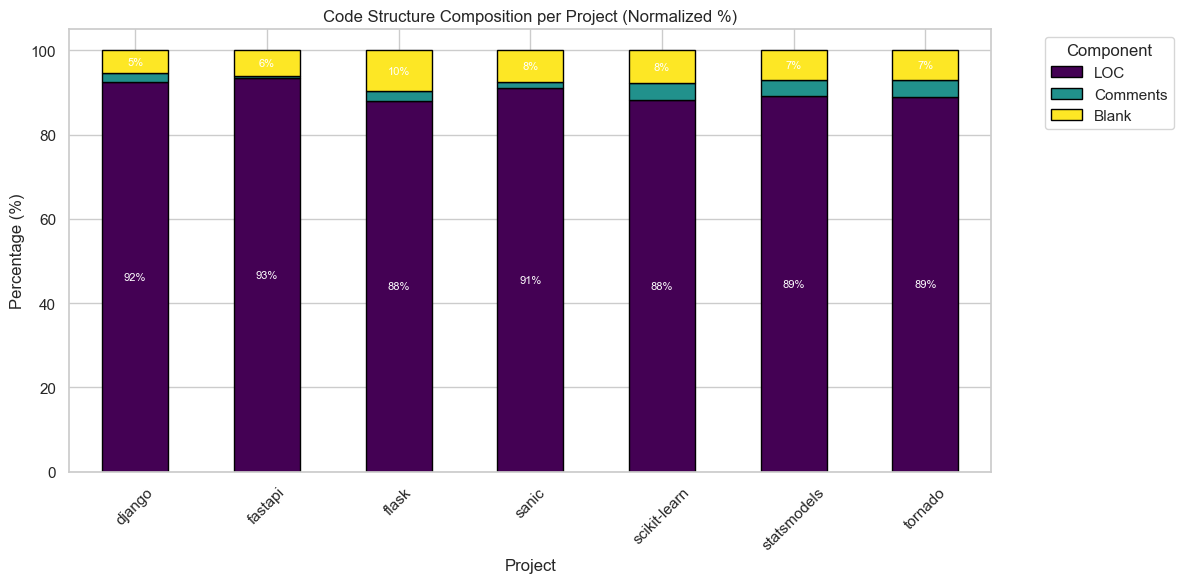

In [9]:
# Normalize the data by row to show percentage contribution
loc_percent = loc_data.div(loc_data.sum(axis=1), axis=0) * 100

# Plot normalized stacked bar
ax = loc_percent.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis', edgecolor='black')
plt.title('Code Structure Composition per Project (Normalized %)')
plt.ylabel('Percentage (%)')
plt.xlabel('Project')
plt.xticks(rotation=45)
plt.legend(title="Component", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage labels
for container in ax.containers:
    labels = [f"{v.get_height():.0f}%" if v.get_height() > 5 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=8, color='white')

plt.tight_layout()
plt.show()

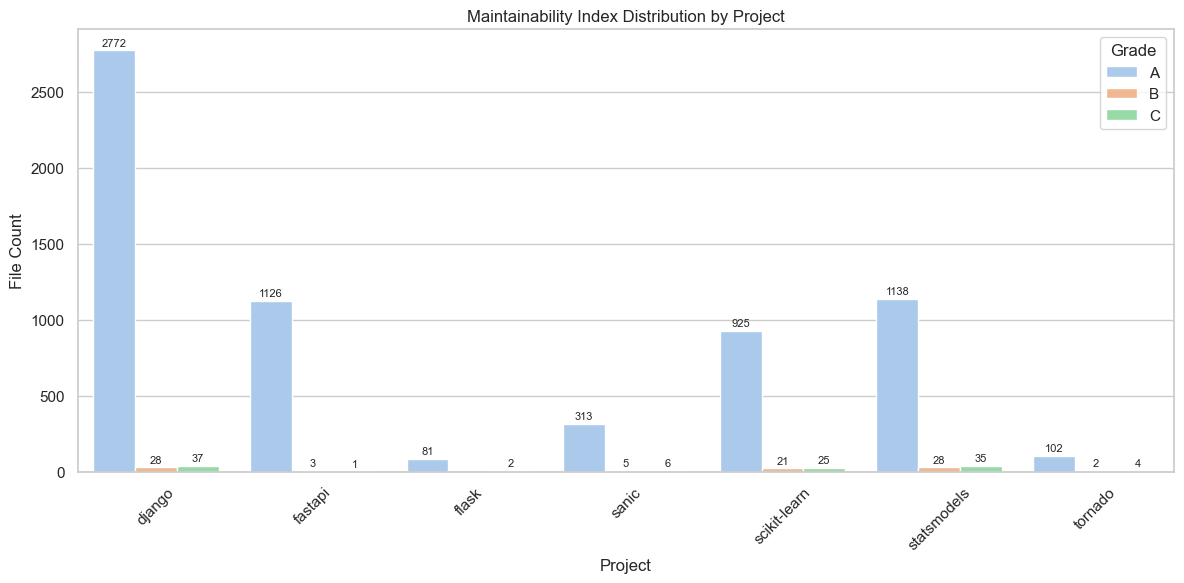

In [11]:
# Maintainability Index Distribution – Figure 6
mi_grouped = mi_combined_df.groupby(["Project", "Grade"])["Count"].sum().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Project", y="Count", hue="Grade", data=mi_grouped, palette="pastel")

# Add count labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2, fontsize=8)

plt.title("Maintainability Index Distribution by Project")
plt.ylabel("File Count")
plt.xlabel("Project")
plt.legend(title="Grade")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
